In [1]:
# Import Dependencies
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import GradientBoostingClassifier  

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load

In [2]:
# Call in the data
df = pd.read_csv('Resources/preprocessed.csv')
del df['Unnamed: 0']
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,_5,9.99,7.99,1,0,245
1,_1,_1,_6,9.99,7.99,1,1,453
2,_1,_1,_7,9.99,7.99,1,0,409
3,_1,_1,_8,9.99,7.99,1,0,191
4,_1,_1,_9,9.99,9.99,0,0,145


In [3]:
# Assign product variables
pro1=df[df['Product']=='_1']
pro2=df[df['Product']=='_2']
pro3=df[df['Product']=='_3']    

In [4]:
# Create features
X=df.drop(columns=['Weekly_Units_Sold'], axis = 1)

X=pd.get_dummies(X)

# Create target. 
y = df['Weekly_Units_Sold']

## Gradient Boosting Regression

In [5]:
model=GradientBoostingRegressor()
# # Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculating Cross Validation Score across multiple testing sets
scores = cross_val_score(model, X_train_scaled, y_train, cv=20)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.88 accuracy with a standard deviation of 0.07
0.9036436493215062
0.8138822681407187
43.35080188185705
0.8138822681407187


Text(0, 0.5, 'Feature Importance Score')

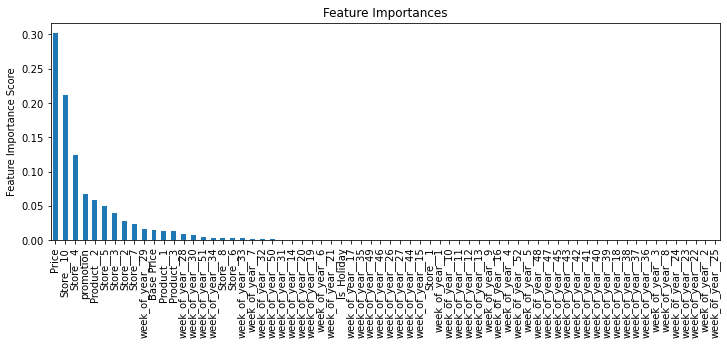

In [8]:
feat_imp = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [9]:
cross_val_score(model, X_train_scaled, y_train, cv=10)

array([0.89406359, 0.93226116, 0.89055015, 0.83312848, 0.88488664,
       0.90094371, 0.86282145, 0.76095428, 0.82520686, 0.91867527])

In [10]:
(scores.mean(), scores.std())

(0.8806058697979686, 0.06771540595295861)

In [11]:
# print(dir(GradientBoostingRegressor))
GradientBoostingRegressor()

GradientBoostingRegressor()

In [12]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingRegressor(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model=gb.fit(X_train_scaled,y_train)
    y_pred=(gb_model.predict(X_test_scaled))
    # precision_recall_fscore_support(y_test, y_pred)
    print(f'Mean Absolute Error: {mean_absolute_error(y_test,pred)}')
    print(f'Root Mean Squared Error: {r2_score(y_test,pred)}')

In [15]:
for n_est in [50,100,150]:
    for max_depth in [3,7,11]:
        for lr in [0.01,0.1,1]:
            train_GB(n_est, max_depth, lr)

Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean Absolute Error: 43.35080188185705
Root Mean Squared Error: 0.8138822681407187
Mean

In [ ]:
# #  Scale the data
# scaler=StandardScaler().fit(X)
# X_scaled=scaler.transform(X)

In [ ]:
# def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
#     #Fit the algorithm on the data
#     alg.fit(dtrain[predictors], dtrain['Weekly_Units_Sold'])
        
#     #Predict training set:
#     dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

#     #Perform cross-validation:
#     if performCV:
#         cv_score = cross_val_score(alg, dtrain[predictors], dtrain['Weekly_Units_Sold'], cv=cv_folds, scoring='roc_auc')

#     # Print Model Report:
#     print("Model Report")
#     print("Accuracy: " (accuracy_score(dtrain['Weekly_Units_Sold'].values, dtrain_predictions)))
#     print("AUC Score(Train): " (roc_auc_score(dtrain["Weekly_Units_Sold"], dtrain_predprob)))
#     print("CV Score : Mean - | STD - | Min - | Max - | " (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

#     #Print Feature Importance:
#     if printFeatureImportance:
#         feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
#         feat_imp.plot(kind='bar', title='Feature Importances')
#         plt.ylabel('Feature Importance Score')      

    

In [ ]:
# predictors = X.columns
# gbm0=GradientBoostingClassifier(random_state=1)
# modelfit(gbm0, X, predictors)